In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt 

DATA = './DATA'
LAFAN = os.path.join(DATA, 'curr_lafan_sample.npy')
VIBE = os.path.join(DATA, 'curr_vibe_issue.npy')
# os.listdir(DATA)
os.path.exists(LAFAN), os.path.exists(VIBE)

np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Extract position(and rotation) data

In [3]:
lafan_data = np.load(LAFAN, allow_pickle=True).item()
vibe_data = np.load(VIBE, allow_pickle=True).item()

In [4]:
lafan_data.keys(), vibe_data.keys()

(dict_keys(['positions', 'rotations', 'positions_lerp', 'rotations_lerp', 'contacts_l', 'contacts_r', 'parents', 'window_size', 'n_past', 'n_future', 'filenames', 'themes', 'descriptions']),
 dict_keys(['positions', 'rotations', 'positions_pred', 'rotations_pred', 'parents', 'mask']))

In [5]:
lafan_pos = lafan_data['positions'].numpy()
lafan_rot = lafan_data['rotations'].numpy()
vibe_pos = vibe_data['positions']
vibe_rot = vibe_data['rotations']

In [6]:
bundle = [lafan_pos, lafan_rot, vibe_pos, vibe_rot]
list(map(lambda x:(x.shape), bundle))

[(1, 65, 22, 3), (1, 65, 22, 4), (1, 65, 22, 3), (1, 65, 22, 4)]

In [7]:
FRAME_SELECT = 12
JOINT_SELECT = 13
check_lafan_pos = lafan_pos[0, FRAME_SELECT, JOINT_SELECT,:]
check_lafan_rot = lafan_rot[0, FRAME_SELECT, JOINT_SELECT,:]
check_vibe_pos = vibe_pos[0, FRAME_SELECT, JOINT_SELECT,:]
check_vibe_pos = vibe_rot[0, FRAME_SELECT, JOINT_SELECT,:]

check_lafan_pos_t = lafan_pos[0, :, JOINT_SELECT,:]
check_lafan_rot_t = lafan_rot[0, :, JOINT_SELECT,:]
check_vibe_pos_t = vibe_pos[0, :, JOINT_SELECT,:]
check_vibe_rot_t = vibe_rot[0, :, JOINT_SELECT,:]

In [11]:
for joint in range(22):
    
    if joint == 0:
        lafan_pos_take = lafan_pos[0, :, joint,:]
        print(f"For joint [root], we have: {lafan_pos_take}")
    else:
        lafan_pos_take = lafan_pos[0, 0, joint,:]
        print(f"For joint {joint}, we have: {lafan_pos_take}")

For joint [root], we have: [[-6.392896 184.572601 0.385330]
 [-6.456480 184.916702 -0.062007]
 [-6.527120 185.173706 -0.594004]
 [-6.676875 185.181900 -1.185384]
 [-6.820142 185.285507 -1.876923]
 [-6.924960 185.289703 -2.697518]
 [-6.968996 185.284195 -3.641641]
 [-6.928490 185.271194 -4.654502]
 [-6.775387 185.230698 -5.800161]
 [-6.502420 185.174103 -7.008003]
 [-6.142739 185.182495 -8.241011]
 [-5.664980 185.310104 -9.441207]
 [-5.217853 185.506699 -10.594281]
 [-4.639102 185.983093 -11.732234]
 [-4.155186 186.751099 -12.860211]
 [-3.835870 187.402100 -13.888186]
 [-3.509690 187.850906 -14.708256]
 [-3.069940 188.169296 -15.388420]
 [-2.872977 188.340195 -15.921894]
 [-2.690426 188.496597 -16.348078]
 [-2.450476 188.528793 -16.517256]
 [-2.242352 188.207199 -16.520327]
 [-2.171792 187.385696 -16.404116]
 [-2.147254 186.093597 -16.176115]
 [-2.091642 185.137802 -15.777652]
 [-2.101253 184.109802 -15.260735]
 [-2.107547 183.342606 -14.578214]
 [-1.949611 182.630905 -13.686025]
 [-1.9

In [104]:
check_lafan_pos_t

array([[11.766615, 0.000004, -0.000012],
       [11.766615, 0.000004, -0.000012],
       [11.766615, 0.000004, -0.000012],
       [11.766615, 0.000004, -0.000012],
       [11.766615, 0.000004, -0.000012],
       [11.766615, 0.000004, -0.000012],
       [11.766615, 0.000004, -0.000012],
       [11.766615, 0.000004, -0.000012],
       [11.766615, 0.000004, -0.000012],
       [11.766615, 0.000004, -0.000012],
       [11.766615, 0.000004, -0.000012],
       [11.766615, 0.000004, -0.000012],
       [11.766615, 0.000004, -0.000012],
       [11.766615, 0.000004, -0.000012],
       [11.766615, 0.000004, -0.000012],
       [11.766615, 0.000004, -0.000012],
       [11.766615, 0.000004, -0.000012],
       [11.766615, 0.000004, -0.000012],
       [11.766615, 0.000004, -0.000012],
       [11.766615, 0.000004, -0.000012],
       [11.766615, 0.000004, -0.000012],
       [11.766615, 0.000004, -0.000012],
       [11.766615, 0.000004, -0.000012],
       [11.766615, 0.000004, -0.000012],
       [11.76661

In [63]:
check_vibe_pos_t

array([[-12.466438, 0.414436, 2.109980],
       [-12.506183, 0.418663, 1.846987],
       [-12.516753, 0.422910, 1.750383],
       [-12.572476, 0.422373, 1.533434],
       [-12.624078, 0.492051, 1.299159],
       [-12.650185, 0.565536, 1.273194],
       [-12.664949, 0.541440, 1.099139],
       [-12.655163, 0.550534, 1.154351],
       [-12.693901, 0.564536, 0.929661],
       [-12.748043, 0.562137, 0.631539],
       [-12.757695, 0.568865, 0.725210],
       [-12.704594, 0.601827, 0.698982],
       [-12.689004, 0.566053, 0.765067],
       [-12.615714, 0.538537, 0.940092],
       [-12.604990, 0.497617, 1.050827],
       [-12.601485, 0.486015, 0.856291],
       [-12.562454, 0.374344, 0.851471],
       [-12.636583, 0.372842, 0.722850],
       [-12.610984, 0.203782, 0.623342],
       [-12.660120, 0.239038, 0.344770],
       [-12.648236, 0.192651, 0.518577],
       [-12.651995, 0.121118, 0.499993],
       [-12.660227, 0.122993, 0.466177],
       [-12.634433, 0.099793, 0.558585],
       [-12.5944

In [110]:
check_lafan_rot_t

array([[0.969993, -0.137867, 0.170637, 0.104834],
       [0.970521, -0.136434, 0.169120, 0.104276],
       [0.971430, -0.133819, 0.166092, 0.104064],
       [0.972569, -0.129856, 0.162348, 0.104358],
       [0.974253, -0.125505, 0.156677, 0.102622],
       [0.976178, -0.121008, 0.151116, 0.097965],
       [0.976535, -0.118391, 0.151684, 0.096723],
       [0.976702, -0.117721, 0.151230, 0.096566],
       [0.977567, -0.116987, 0.147092, 0.095085],
       [0.978285, -0.116027, 0.143418, 0.094484],
       [0.978947, -0.114379, 0.138624, 0.096763],
       [0.980363, -0.110830, 0.130612, 0.097705],
       [0.981055, -0.107601, 0.125287, 0.101271],
       [0.981995, -0.103280, 0.121894, 0.100798],
       [0.983994, -0.097773, 0.116125, 0.093330],
       [0.986528, -0.091310, 0.105190, 0.085786],
       [0.988218, -0.085972, 0.095607, 0.083024],
       [0.989166, -0.081687, 0.089119, 0.083285],
       [0.990173, -0.076410, 0.083604, 0.082037],
       [0.990902, -0.073145, 0.078433, 0.081314],


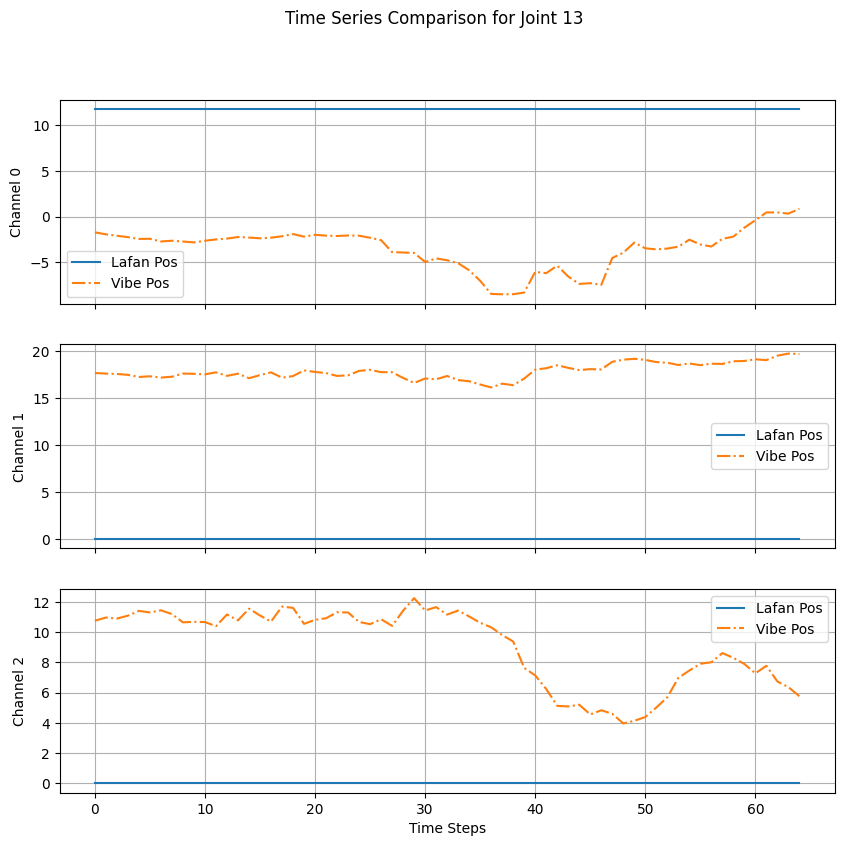

In [12]:

# Number of channels (axis=3)
num_channels = check_lafan_pos_t.shape[1]

# Time axis
time_steps = np.arange(check_lafan_pos_t.shape[0])

# Plot time-series for each channel
fig, axes = plt.subplots(num_channels, 1, figsize=(10, num_channels * 3), sharex=True)

# draw = 'rot'
draw = 'pos'

for i in range(num_channels):
    if draw == 'pos':
        axes[i].plot(time_steps, check_lafan_pos_t[:, i], label='Lafan Pos', linestyle='-')    
        axes[i].plot(time_steps, check_vibe_pos_t[:, i], label='Vibe Pos', linestyle='-.')
    if draw =='rot':
        axes[i].plot(time_steps, check_lafan_rot_t[:, i], label='Lafan Rot', linestyle='--')
        axes[i].plot(time_steps, check_vibe_rot_t[:, i], label='Vibe Rot', linestyle=':')
    
    axes[i].set_ylabel(f'Channel {i}')
    axes[i].legend()
    axes[i].grid()

axes[-1].set_xlabel('Time Steps')

plt.suptitle(f'Time Series Comparison for Joint {JOINT_SELECT}')
plt.show()


In [108]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from utils.lafan1.calc_utils import *

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

def visualize_quaternion_rotation(initial_orientation, rotation_quaternion):
    """
    Visualize quaternion rotation applied to an initial orientation with arc showing z-axis rotation.
    
    Parameters:
    - initial_orientation: quaternion in [w, x, y, z] format
    - rotation_quaternion: quaternion in [w, x, y, z] format
    """
    # Normalize quaternions
    initial_orientation = quat_normalize(initial_orientation)
    rotation_quaternion = quat_normalize(rotation_quaternion)
    
    # Apply rotation: result = initial * rotation
    result_orientation = quat_mul(initial_orientation, rotation_quaternion)
    
    # Create figure and 3D axis
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Set equal aspect ratio
    ax.set_box_aspect([1, 1, 1])
    
    # Convert quaternions to rotation matrices
    initial_matrix = quat_to_rotation_matrix(initial_orientation)
    result_matrix = quat_to_rotation_matrix(result_orientation)
    
    # Define coordinate system origin
    origin = np.array([0, 0, 0])
    
    # Draw coordinate axes for initial orientation (gray)
    draw_axes(ax, origin, initial_matrix, 1.0, ['dimgray', 'dimgray', 'dimgray'], ['-', '-', '-'])
    
    # Draw coordinate axes for resulting orientation (dotted gray)
    draw_axes(ax, origin, result_matrix, 1.0, ['darkgray', 'darkgray', 'darkgray'], [':', ':', ':'])
    
    # Add global reference frame
    draw_axes(ax, origin, np.eye(3), 0.5, ['r', 'g', 'b'])
    
    # Draw arc showing z-axis rotation
    initial_z = initial_matrix[:, 2]  # z-axis of initial orientation
    result_z = result_matrix[:, 2]    # z-axis of result orientation
    
    # Generate points for the arc (using spherical interpolation)
    num_points = 30
    arc_points = []
    for i in range(num_points + 1):
        t = i / num_points
        # Spherical interpolation between initial_z and result_z
        point = slerp(initial_z, result_z, t)
        arc_points.append(point)
    
    arc_points = np.array(arc_points)
    
    # Draw the arc
    ax.plot(arc_points[:, 0], arc_points[:, 1], arc_points[:, 2], 
           color='purple', linestyle='-', linewidth=2)
    
    # Add arrow to show direction
    mid_point = int(num_points * 0.7)  # Position arrow at 70% of the arc
    direction = arc_points[mid_point+1] - arc_points[mid_point-1]
    direction = direction / np.linalg.norm(direction) * 0.1  # Scale arrow
    
    arrow = Arrow3D([arc_points[mid_point, 0], arc_points[mid_point, 0] + direction[0]],
                   [arc_points[mid_point, 1], arc_points[mid_point, 1] + direction[1]],
                   [arc_points[mid_point, 2], arc_points[mid_point, 2] + direction[2]],
                   mutation_scale=15, lw=2, arrowstyle='-|>', color='purple')
    ax.add_artist(arrow)
    
    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Quaternion Rotation Visualization')
    
    # Set view angle
    ax.view_init(elev=30, azim=45)
    
    plt.tight_layout()
    plt.show()

def slerp(v1, v2, t):
    """Spherical linear interpolation between two vectors"""
    v1 = v1 / np.linalg.norm(v1)
    v2 = v2 / np.linalg.norm(v2)
    
    dot = np.dot(v1, v2)
    dot = np.clip(dot, -1.0, 1.0)  # Ensure dot is in valid range
    
    if dot > 0.9995:
        # If vectors are very close, use linear interpolation
        return v1 + t * (v2 - v1)
    
    # Spherical interpolation
    theta = np.arccos(dot)
    sin_theta = np.sin(theta)
    
    s1 = np.sin((1.0 - t) * theta) / sin_theta
    s2 = np.sin(t * theta) / sin_theta
    
    return s1 * v1 + s2 * v2

def draw_axes(ax, origin, rotation_matrix, scale=1.0, colors=['r', 'g', 'b'], line_styles=['-', '-', '-']):
    """Draw coordinate axes with the given orientation"""
    for i, (color, style) in enumerate(zip(colors, line_styles)):
        # Get the i-th axis vector after rotation
        axis = rotation_matrix[:, i] * scale
        
        # Draw the axis line
        ax.quiver(origin[0], origin[1], origin[2],
                 axis[0], axis[1], axis[2],
                 color=color, linestyle=style, arrow_length_ratio=0.15)

def quat_to_rotation_matrix(q):
    """Convert quaternion to rotation matrix"""
    w, x, y, z = q
    
    return np.array([
        [1 - 2*y*y - 2*z*z, 2*x*y - 2*w*z, 2*x*z + 2*w*y],
        [2*x*y + 2*w*z, 1 - 2*x*x - 2*z*z, 2*y*z - 2*w*x],
        [2*x*z - 2*w*y, 2*y*z + 2*w*x, 1 - 2*x*x - 2*y*y]
    ])

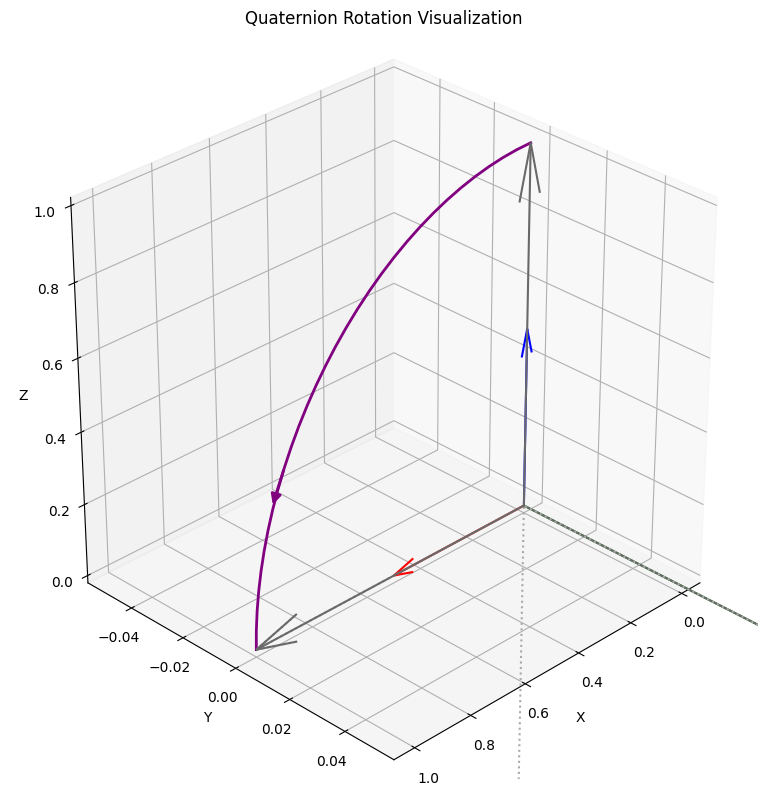

In [109]:
# Example: Rotate 90 degrees around Y axis
initial_orientation = np.array([1.0, 0.0, 0.0, 0.0])  # Identity quaternion
rotation_quaternion = np.array([0.7071, 0.0, 0.7071, 0.0])  # 90° rotation around Y

visualize_quaternion_rotation(initial_orientation, rotation_quaternion)

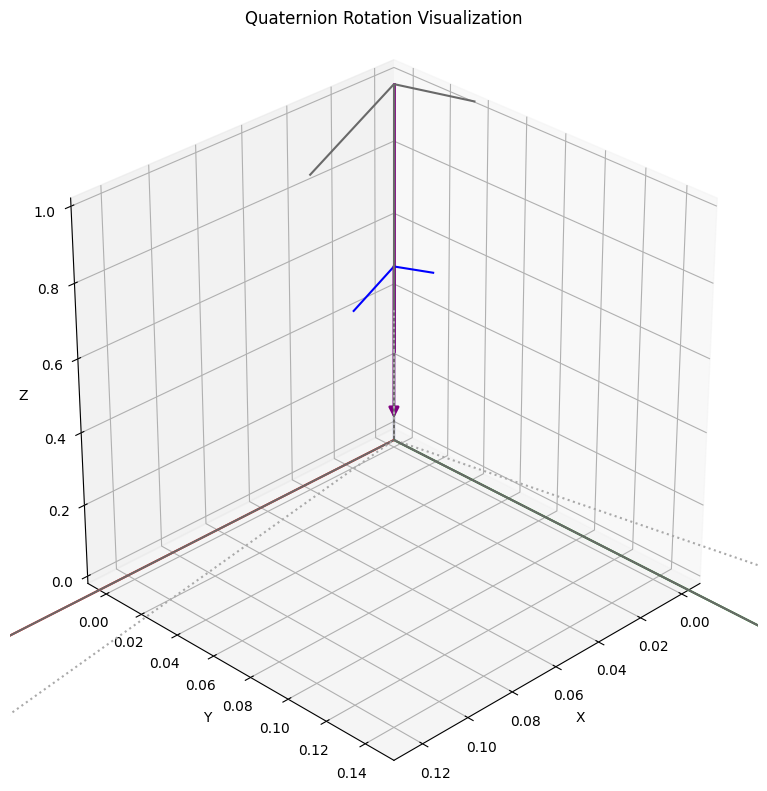

In [112]:
rot = np.array([0.991482, -0.066526, 0.068212, 0.088798])
visualize_quaternion_rotation(initial_orientation, rot)